In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pylab as plt
import matplotlib.pyplot as plt

import seaborn as sns

from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
import random
import string

from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [10]:
audio_files = glob('archive/*/*.wav')

# Audio objetivo
audio_objetivo = audio_files[1]

# Play audio objetivo
ipd.Audio(audio_objetivo)

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (78724,)
sr: 22050


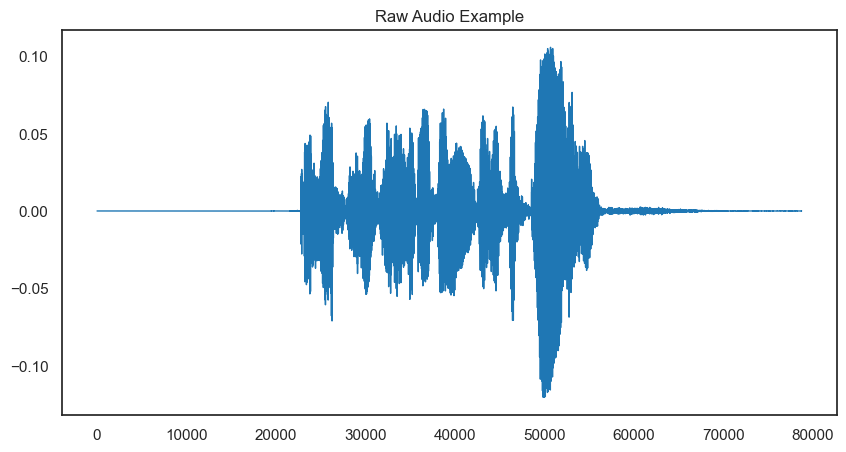

In [11]:
y, sr = librosa.load(audio_objetivo)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [12]:
# Parámetros del algoritmo genético
tamano_poblacion = 50
probabilidad_mutacion = 0.1
numero_generaciones = 10

# Generar población inicial
poblacion = []
for _ in range(tamano_poblacion):
    audio = audio_files[random.randint(0, 50)]
    poblacion.append(audio)

In [13]:
# Función de aptitud (similitud entre el audio y el audio objetivo)
def calcular_aptitud(audio, audio_objetivo):
    
    signal_audio, sr_audio = librosa.load(audio)
    signal_objetivo, sr_objetivo = librosa.load(audio_objetivo)

    mfcc_audio = mfcc(signal_audio, samplerate=16000, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=512, lowfreq=0, highfreq=None, preemph=0.97, ceplifter=22, appendEnergy=True)
    mfcc_objetivo = mfcc(signal_objetivo, samplerate=16000, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=512, lowfreq=0, highfreq=None, preemph=0.97, ceplifter=22, appendEnergy=True)

    if mfcc_audio.shape[0] < mfcc_objetivo.shape[0]:
        mfcc_objetivo1 = mfcc_objetivo[:len(mfcc_audio), :]
        mfcc_audio1 = mfcc_audio
        
    else:
        mfcc_audio1 = mfcc_audio[:len(mfcc_objetivo), :]
        mfcc_objetivo1 = mfcc_objetivo

    # Ambas matrices tendrán la misma forma
    print(mfcc_audio1.shape)  # (num_frames, n_mfcc)
    print(mfcc_objetivo1.shape)  # (num_frames, n_mfcc)

    # Calcular la similitud entre los vectores de características utilizando la distancia euclidiana
    similitud = np.linalg.norm(mfcc_audio1 - mfcc_objetivo1)
    return similitud


In [14]:
# Algoritmo genético
for generacion in range(numero_generaciones):
    print(f"Generación {generacion+1}:")
    aptitudes = [calcular_aptitud(audio, audio_objetivo) for audio in poblacion]
    
    mejores_audios = sorted(zip(poblacion, aptitudes), key=lambda x: x[1], reverse=True)[:int(tamano_poblacion/2)]
    
    nueva_generacion = []
    
    for _ in range(tamano_poblacion):
        padre1, padre2 = random.choices(mejores_audios, weights=[aptitud for _, aptitud in mejores_audios], k=2)
        punto_cruza = random.randint(1, len(audio_objetivo)-1)
        hijo = padre1[0][:punto_cruza] + padre2[0][punto_cruza:]
        
        #if random.random() < probabilidad_mutacion:
        #    indice_mutacion = random.randint(0, len(audio_objetivo)-1)
        #    hijo = hijo[:indice_mutacion] + random.choice(string.ascii_lowercase + ' ') + hijo[indice_mutacion+1:]
        
        nueva_generacion.append(hijo)
        print(f"Hijo generado: {hijo}")
    
    poblacion = nueva_generacion

Generación 1:
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(482, 13)
(482, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(482, 13)
(482, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(486, 13)
(486, 13)
(491, 13)
(491, 13)
(473, 13)
(473, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(486, 13)
(486, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 

(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
Hijo generado: archive/Actor_16/03-01-05-02-01-01-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-01-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-01-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-01-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-01-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Acto

(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo g

(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/03-01-05-02-01-02-16.wav
Hijo generado: archive/Actor_16/0

In [15]:
# Obtener el mejor audio
aptitudes = [calcular_aptitud(audio, audio_objetivo) for audio in poblacion]
mejor_audio, mejor_aptitud = max(zip(poblacion, aptitudes), key=lambda x: x[1])

print(f"\nMejor audio encontrado:")
print(f"Audio: {mejor_audio}")
print(f"Aptitud: {mejor_aptitud}")

(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)
(491, 13)


In [16]:
# Play audio file
ipd.Audio(audio_objetivo)

In [ ]:
# Play audio file
ipd.Audio(mejor_audio)